In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import root_mean_squared_error
from math import sqrt
from xgboost import XGBRegressor

%matplotlib inline

In [2]:
df_features = pd.read_csv('Dataset/features.csv')
df_stores = pd.read_csv('Dataset/stores.csv')
df_train = pd.read_csv('Dataset/train.csv')
df_test = pd.read_csv('Dataset/test.csv')

In [3]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [8]:
df_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


##Merge the two datasets into one for ease: features and stores

In [10]:
df_features.shape

(8190, 12)

In [11]:
df_stores.shape

(45, 3)

In [12]:
df_train.shape

(421570, 5)

In [13]:
df_test.shape

(115064, 4)

In [14]:
df_features['Store'].value_counts()

Store
1     182
24    182
26    182
27    182
28    182
29    182
30    182
31    182
32    182
33    182
34    182
35    182
36    182
37    182
38    182
39    182
40    182
41    182
42    182
43    182
44    182
25    182
23    182
2     182
22    182
3     182
4     182
5     182
6     182
7     182
8     182
9     182
10    182
11    182
12    182
13    182
14    182
15    182
16    182
17    182
18    182
19    182
20    182
21    182
45    182
Name: count, dtype: int64

In [15]:
df_features['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [16]:
df_storefeatures = df_features.merge(df_stores,on ='Store',how = 'left')
df_storefeatures.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [17]:
df_storefeatures.shape

(8190, 14)

In [18]:
df_storefeatures['Type'].value_counts()

Type
A    4004
B    3094
C    1092
Name: count, dtype: int64

In [19]:
#check for any duplicate values
df_dup=df_storefeatures[df_storefeatures.duplicated(keep= False)]
df_dup   #No duplicate rows

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size


In [20]:
df_train.duplicated().any()

False

In [21]:
df_test.duplicated().any()

False

In [22]:
df_storefeatures.duplicated().any()

False

In [23]:
df_storefeatures[df_storefeatures.duplicated()].count()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

No duplicate values in dataframe

## Data Cleaning

In [26]:
df_storefeatures.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [27]:
mkdn_cols = df_storefeatures. filter(like='MarkDown')

#calculate the fraction of NaNs per column

Pcnt_NaN = mkdn_cols.isna().mean()*100

Pcnt_NaN

MarkDown1    50.769231
MarkDown2    64.334554
MarkDown3    55.885226
MarkDown4    57.704518
MarkDown5    50.549451
dtype: float64

We see that all of the Markdown columns has >= 50% of data full of NaN value. If we replace the NaN values with 0/mean, there is a high chance of Overfitting. So lets drop the columns and create a new dataframe.

In [29]:
#df_storefeatures.fillna({"MarkDown1":0,"MarkDown2":0,"MarkDown3":0,"MarkDown4":0,"MarkDown5":0},inplace= True)

In [30]:
df_sf= df_storefeatures.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis = 'columns')

In [31]:
df_sf.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
Type              0
Size              0
dtype: int64

In [32]:
df_sf.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size
count,8190.000000,8190.000000,8190.000000,7605.000000,7605.000000,8190.000000
mean,23.000000,59.356198,3.405992,172.460809,7.826821,130287.600000
std,12.987966,18.678607,0.431337,39.738346,1.877259,63115.971429
min,1.000000,-7.290000,2.472000,126.064000,3.684000,34875.000000
25%,12.000000,45.902500,3.041000,132.364839,6.634000,70713.000000
50%,23.000000,60.710000,3.513000,182.764003,7.806000,126512.000000
75%,34.000000,73.880000,3.743000,213.932412,8.567000,202307.000000
max,45.000000,101.950000,4.468000,228.976456,14.313000,219622.000000


In [33]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   bool   
 7   Type          8190 non-null   object 
 8   Size          8190 non-null   int64  
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 520.0+ KB


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [36]:
df_sf[['CPI','Unemployment']] = df_sf[['CPI','Unemployment']].apply(lambda x:x.fillna(x.mean()))

In [37]:
df_sf.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

We replaced the NA values for CPI and Unemployment with the mean value

In [39]:
df_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [40]:
df_test.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [41]:
df_sf['Date'].min(),df_sf['Date'].max()

('2010-02-05', '2013-07-26')

Dataset has data available for date range- ('2010-02-05', '2013-07-26')

In [43]:
#count unique values in the dataset
df_sf.apply(lambda x:x.nunique()) 

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
CPI             2506
Unemployment     405
IsHoliday          2
Type               3
Size              40
dtype: int64

In [44]:
distinct_val = df_sf.apply(lambda x:x.unique()) 
print(distinct_val)

Store           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Date            [2010-02-05, 2010-02-12, 2010-02-19, 2010-02-2...
Temperature     [42.31, 38.51, 39.93, 46.63, 46.5, 57.79, 54.5...
Fuel_Price      [2.572, 2.548, 2.514, 2.561, 2.625, 2.667, 2.7...
CPI             [211.0963582, 211.2421698, 211.2891429, 211.31...
Unemployment    [8.106, 7.808, 7.787, 7.838, 7.742, 7.682, 7.9...
IsHoliday                                           [False, True]
Type                                                    [A, B, C]
Size            [151315, 202307, 37392, 205863, 34875, 202505,...
dtype: object


In [45]:
#count unique values in the dataset
df_train.apply(lambda x:x.nunique()) 

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [46]:
#Processing each columns

In [47]:
df_sf['Fuel_Price'].value_counts()

Fuel_Price
3.417    43
3.638    43
3.630    40
3.583    39
3.620    37
         ..
3.053     1
3.448     1
3.925     1
3.690     1
3.507     1
Name: count, Length: 1011, dtype: int64

In [48]:
#Change the Date field from object to date type
df_sf['Date'] = pd.to_datetime(df_sf['Date'])

In [49]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   CPI           8190 non-null   float64       
 5   Unemployment  8190 non-null   float64       
 6   IsHoliday     8190 non-null   bool          
 7   Type          8190 non-null   object        
 8   Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 520.0+ KB


In [50]:
df = df_sf.copy()
df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315


In [51]:
df.describe()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Size
count,8190.000000,8190,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,2011-10-31 12:00:00,59.356198,3.405992,172.460809,7.826821,130287.600000
min,1.000000,2010-02-05 00:00:00,-7.290000,2.472000,126.064000,3.684000,34875.000000
25%,12.000000,2010-12-17 00:00:00,45.902500,3.041000,132.653774,6.833000,70713.000000
50%,23.000000,2011-10-31 12:00:00,60.710000,3.513000,172.460809,7.826821,126512.000000
75%,34.000000,2012-09-14 00:00:00,73.880000,3.743000,212.766994,8.519000,202307.000000
max,45.000000,2013-07-26 00:00:00,101.950000,4.468000,228.976456,14.313000,219622.000000
std,12.987966,NaN,18.678607,0.431337,38.292649,1.808963,63115.971429


In [52]:
print(df.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')


In [53]:
#Also, we are seeing weekly sales in df_train <0. THese could be returns that were made causing the sales value to be negative.

In [54]:
df_train['Weekly_Sales'][df_train['Weekly_Sales']<0].count(),df_train['Weekly_Sales'][df_train['Weekly_Sales']>0].count()

(1285, 420212)

In [55]:
#lets merge the training and featurestores together
df_train.shape,df_sf.shape

((421570, 5), (8190, 9))

In [56]:
#converting date to t
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [57]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Store      115064 non-null  int64         
 1   Dept       115064 non-null  int64         
 2   Date       115064 non-null  datetime64[ns]
 3   IsHoliday  115064 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2)
memory usage: 2.7 MB


In [58]:
df = df_train.merge(df_sf,on = ['Store','Date'],how = 'left')
df.shape

(421570, 12)

In [59]:
test = df_test.merge(df_sf, on = ['Store','Date'],how = 'left')
test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,False,A,151315
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573,False,A,151315
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573,False,A,151315
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573,True,A,151315
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573,False,A,151315


In [60]:
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,False,A,151315


In [61]:
df['Date'].min(),df['Date'].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [62]:
test['Date'].min(),test['Date'].max()

(Timestamp('2012-11-02 00:00:00'), Timestamp('2013-07-26 00:00:00'))

In [63]:
df[df['IsHoliday_x']!=df['IsHoliday_y']]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size


In [64]:
test[test['IsHoliday_x']!=test['IsHoliday_y']]

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size


In [65]:
# since the value of both IsHoliday is same, we can drop one of the column and rename one back for both train and test

df.drop(columns = 'IsHoliday_y', inplace = True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [66]:
df.rename(columns = {'IsHoliday_x':'IsHoliday'},inplace = True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [67]:
test.drop(columns = 'IsHoliday_y', inplace = True)
test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573,A,151315


In [68]:
test.rename(columns = {'IsHoliday_x':'IsHoliday'},inplace = True)
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573,A,151315


In [69]:
df.describe()


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328


In [70]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [71]:
df['Weekly_Sales'][df['Weekly_Sales']<0].count()

1285

Negative sales data could mean bad data or returns as well. Since we are trying to predict how much sales will happen for the future, lets remove these negative rows.

In [73]:
df[df['Weekly_Sales']<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,B,118221


In [74]:
df = df[df['Weekly_Sales']>0]
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [75]:
def gen_features(df):
    #create time series features

    df=df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.isocalendar().year
    df['Month'] = df['Date'].dt.month
    #df['Day'] = df['Date'].dt.day #removing this since the day field always has Friday's date.
    df['Week'] = df['Date'].dt.isocalendar().week

    df['MonthStart']=df['Date'].dt.to_period('M').dt.to_timestamp()
    df['WeekinMonth']=((df['Date']-df['MonthStart']).dt.days//7)+1

    return df
    

In [76]:
df = gen_features(df)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,MonthStart,WeekinMonth
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,2010-02-01,1
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,6,2010-02-01,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,7,2010-02-01,3
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,8,2010-02-01,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,9,2010-03-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,9,39,2012-09-01,4
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,10,40,2012-10-01,1
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,10,41,2012-10-01,2
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,10,42,2012-10-01,3


In [77]:
test = gen_features(test)
test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,MonthStart,WeekinMonth
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573000,A,151315,2012,11,44,2012-11-01,1
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573000,A,151315,2012,11,45,2012-11-01,2
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573000,A,151315,2012,11,46,2012-11-01,3
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573000,A,151315,2012,11,47,2012-11-01,4
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573000,A,151315,2012,11,48,2012-11-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,172.460809,7.826821,B,118221,2013,6,26,2013-06-01,4
115060,45,98,2013-07-05,False,77.50,3.614,172.460809,7.826821,B,118221,2013,7,27,2013-07-01,1
115061,45,98,2013-07-12,False,79.37,3.614,172.460809,7.826821,B,118221,2013,7,28,2013-07-01,2
115062,45,98,2013-07-19,False,82.84,3.737,172.460809,7.826821,B,118221,2013,7,29,2013-07-01,3


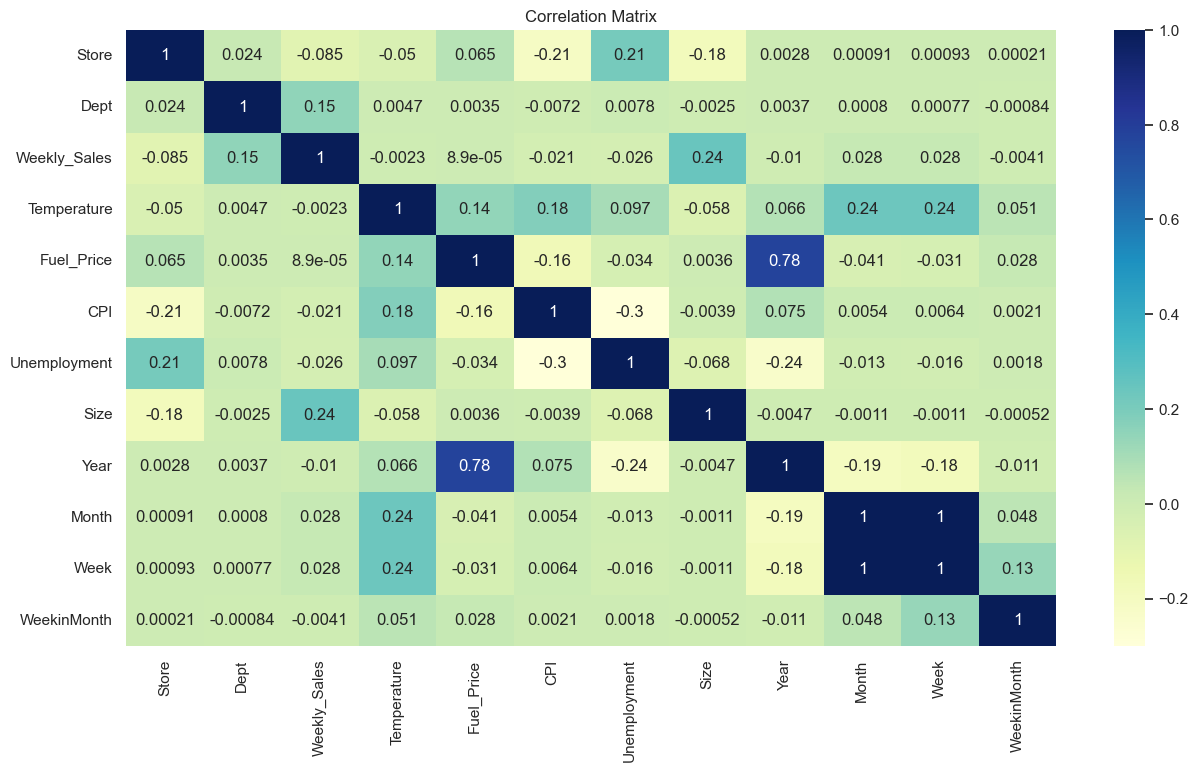

In [78]:
#print(df.corr())
plt.figure(figsize = (15,8))

numeric_df = df.select_dtypes(include = ['number'])

#print(numeric_df.corr())

sns.set_theme(style = 'whitegrid')
#plotting correlation heatmap
dataplot = sns.heatmap(numeric_df.corr(),cmap= 'YlGnBu',annot = True)
sns.set(rc = {'figure.figsize':(25,8)})
plt.title('Correlation Matrix')

plt.show()

Weekly sales show correlation with Dept and size.


Data analysisYear and size shows high correlation. Weekly sales and size shows moderate correlation.

In [81]:
dept_counts = df.groupby('Store')['Dept'].nunique()
dept_counts

Store
1     77
2     78
3     72
4     78
5     72
6     77
7     76
8     76
9     73
10    77
11    78
12    75
13    79
14    77
15    78
16    76
17    76
18    78
19    79
20    78
21    77
22    76
23    77
24    77
25    76
26    76
27    78
28    77
29    77
30    64
31    76
32    77
33    63
34    78
35    73
36    61
37    62
38    63
39    75
40    77
41    77
42    62
43    60
44    60
45    74
Name: Dept, dtype: int64

#Not all departments present in all stores

In [83]:
#Store count by type

Count_bytype_df = df.groupby('Type')['Store'].nunique().reset_index()
#groupby Type to give a dataframe. On that dataframe, count the no of unique stores for each type. Reset index to assign to new dataframe

Count_bytype_df.columns = ['Store_Type','Count_of_stores']

Count_bytype_df

,Store_Type,Count_of_stores
0,A,22
1,B,17
2,C,6


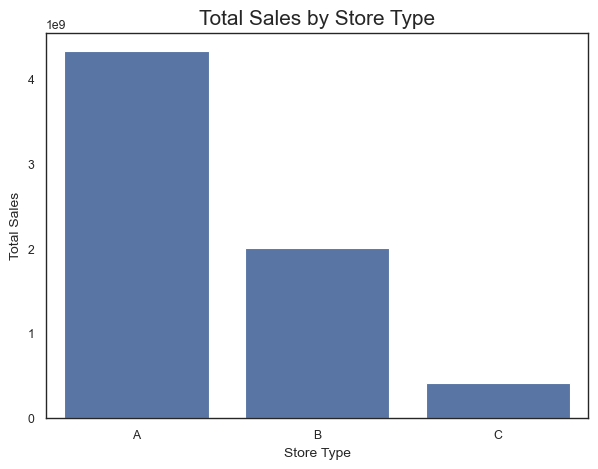

In [84]:
#Total sales by store type

sum_bytypedf= df.groupby('Type')['Weekly_Sales'].sum().reset_index()

sum_bytypedf.columns = ['Store_Type','Total_Sales']

#sum_bytypedf['Total_Sales'] = sum_bytypedf['Total_Sales'].apply(lambda x: f"{x:,.2f}")

sns.set_context("paper")
sns.set_style("white")

plt.figure(figsize = (7,5))
sns.barplot (data = sum_bytypedf,x = 'Store_Type', y = 'Total_Sales')
plt.title('Total Sales by Store Type', fontsize = 15)
plt.xlabel('Store Type', fontsize = 10)
plt.ylabel('Total Sales', fontsize = 10)


plt.show()

Store type c has the least no of sales

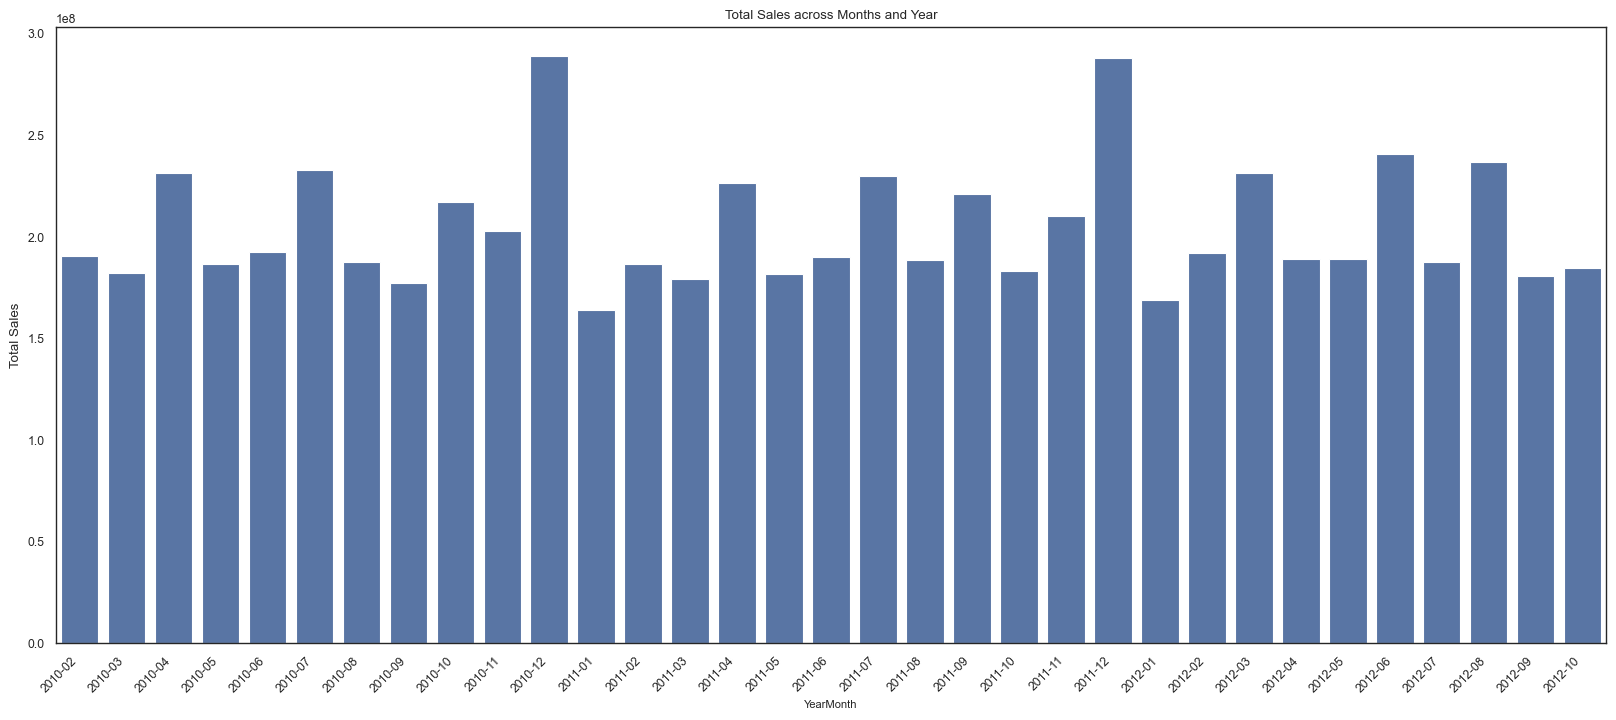

In [86]:


AGG_by_yearmonth= df.groupby(df['Date'].dt.to_period('M'))['Weekly_Sales'].sum().reset_index()

AGG_by_yearmonth.columns = ['YearMonth','Total_Sales']

avgsls = df.groupby(df['Date'].dt.to_period('M'))['Weekly_Sales'].mean()

AGG_by_yearmonth['Avg_Sales'] = avgsls.values

AGG_by_yearmonth['YearMonth'] = AGG_by_yearmonth['YearMonth'].astype(str)

AGG_by_yearmonth = AGG_by_yearmonth.sort_values(by = 'YearMonth')

#Sales by MonthYear
plt.figure (figsize = (20,8))
ax =sns.barplot(data= AGG_by_yearmonth, x = 'YearMonth', y = 'Total_Sales', width = 0.8)
plt.title('Total Sales across Months and Year')
plt.xticks(rotation = 45,ha = 'right')
plt.xlabel('YearMonth', fontsize = 8)
plt.ylabel('Total Sales')
plt.show()

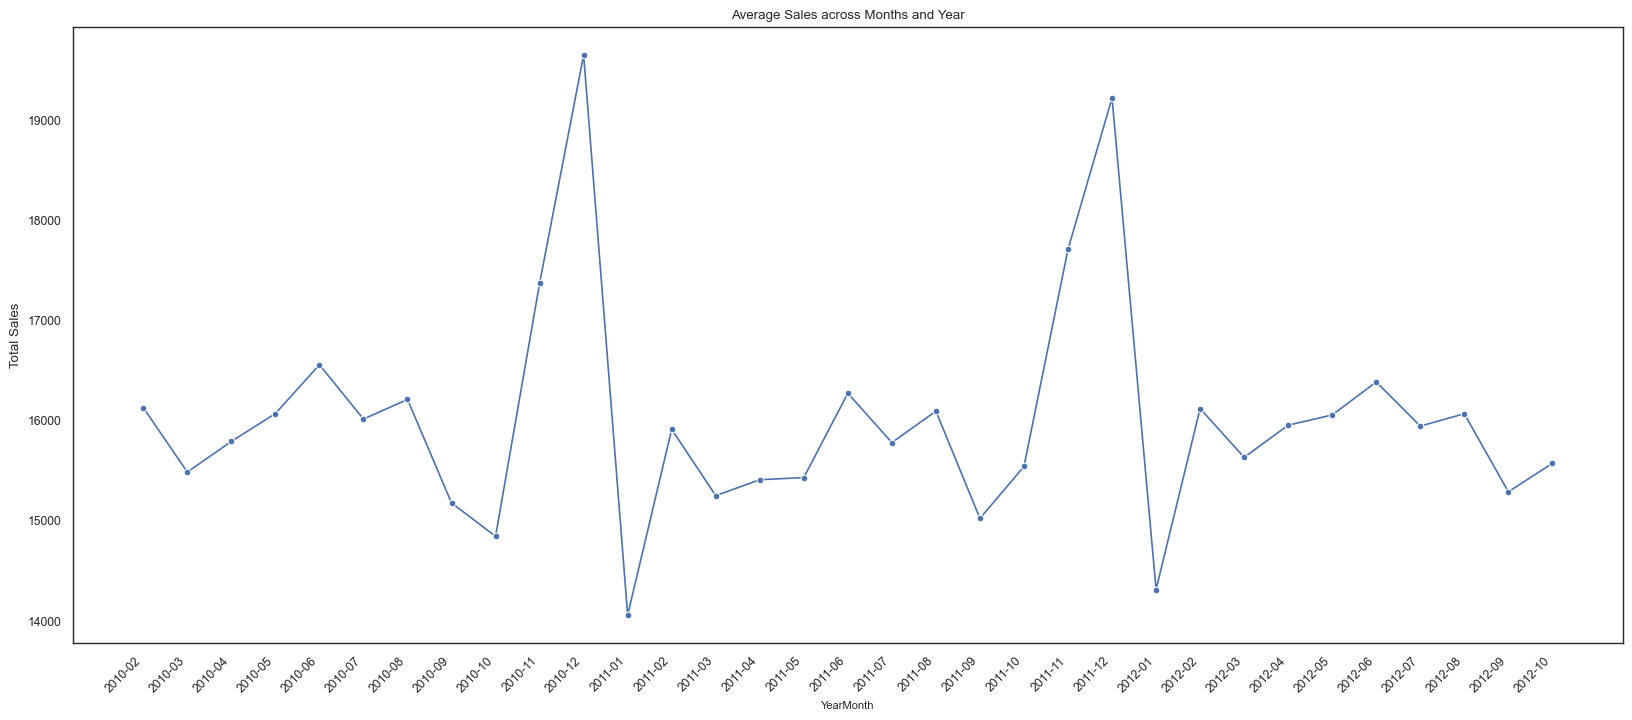

In [87]:

#Average Sales across Month
plt.figure (figsize = (20,8))
sns.lineplot(data = AGG_by_yearmonth, x = 'YearMonth', y = 'Avg_Sales', marker = 'o')
plt.title('Average Sales across Months and Year')
plt.xticks(rotation = 45,ha = 'right')
plt.xlabel('YearMonth', fontsize = 8)
plt.ylabel('Total Sales')
plt.show()

### Here we see seasonality: January every year the average sales are lowest but on November and December the average sales are highest.
Makes sense since  November and December is the holiday season with lots of sales. 

In [89]:
#Sales by holiday

Hol_df = df.groupby('IsHoliday')['Weekly_Sales'].sum().reset_index()

Hol_df.columns = ['IsHoliday','Total_Sales']

Hol_df

,IsHoliday,Total_Sales
0,False,6.232000e+09
1,True,5.053075e+08


In [90]:
#Sales by Store
Store_slsdf = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

Store_slsdf.columns=['Store','Total_Sales']

Store_slsdf = Store_slsdf.sort_values(['Total_Sales'],ascending = False).reset_index(drop = True)

#Top 10 Store
Top10_storedf = Store_slsdf.head(10).reset_index(drop= True)

Top10_storedf

,Store,Total_Sales
0,20,3.014014e+08
1,4,2.995453e+08
2,14,2.890019e+08
3,13,2.865180e+08
4,2,2.753872e+08
5,10,2.716241e+08
6,27,2.538572e+08
7,6,2.237586e+08
8,1,2.224068e+08
9,39,2.074465e+08


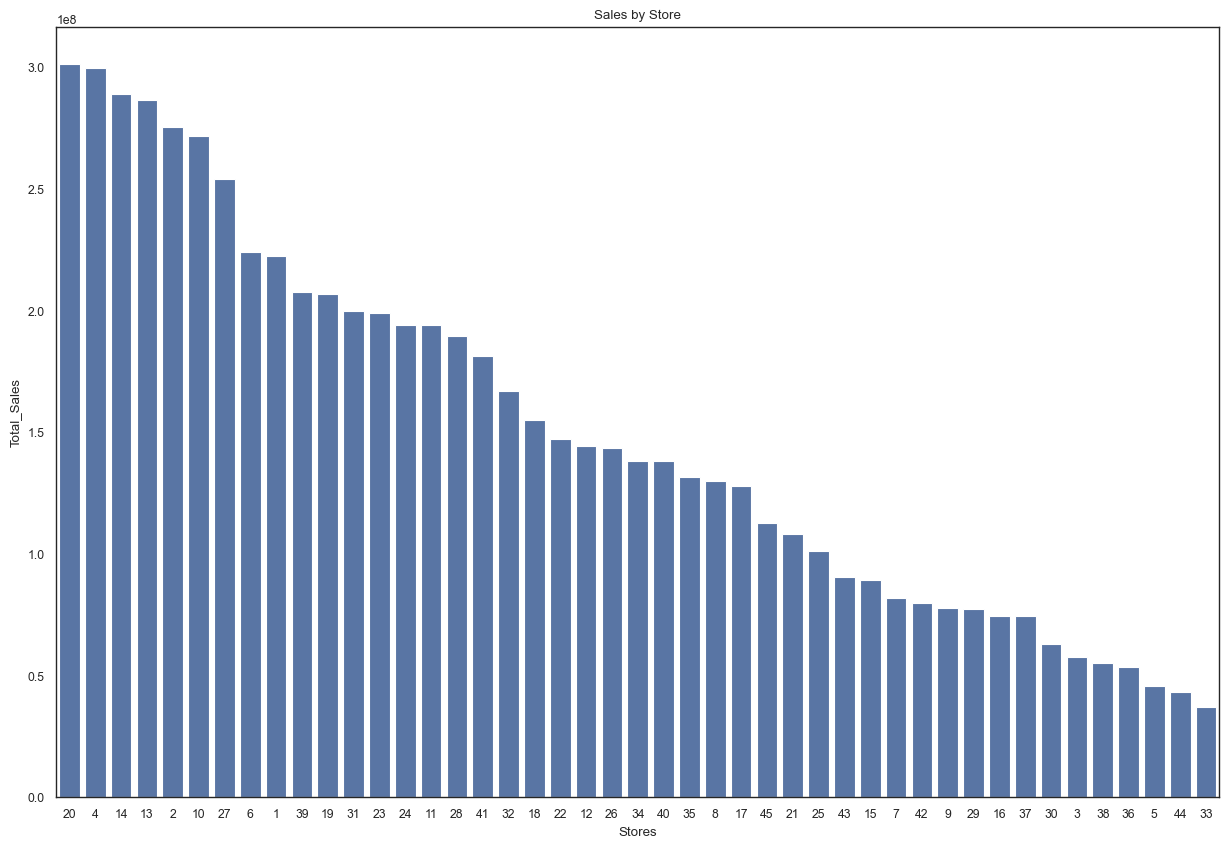

In [91]:
plt.figure(figsize = (15,10))
sorted_stores = Store_slsdf.sort_values(['Total_Sales'],ascending = False)['Store']#get all stores in descending order of Sales
sns.barplot(data = Store_slsdf, x = 'Store',y='Total_Sales', order = sorted_stores)
plt.xlabel('Stores')
plt.ylabel('Total_Sales')
plt.title('Sales by Store')
plt.show()

Store 20 has the highest Sales While Store 33 has the lowest Sales

In [93]:
Bottom10store_df = Store_slsdf.tail(10).sort_values(['Total_Sales']).reset_index(drop = True)
Bottom10store_df #sorted from lowest to higher for bottom10

,Store,Total_Sales
0,33,37160325.40
1,44,43293671.55
2,5,45476119.71
3,36,53413353.10
4,38,55159900.70
5,3,57587925.87
6,30,62717012.33
7,37,74202860.54
8,16,74256735.10
9,29,77142826.53


In [94]:
#Sales by Department
dept_slsdf = df.groupby('Dept')['Weekly_Sales'].sum().reset_index()

dept_slsdf.columns=['Dept','Total_Sales']

dept_slsdf = dept_slsdf.sort_values(['Total_Sales'],ascending = False).reset_index(drop=True)

#Top 10 Store
Top10_deptdf = dept_slsdf.head(10).reset_index(drop= True)

Top10_deptdf

,Dept,Total_Sales
0,92,4.839433e+08
1,95,4.493202e+08
2,38,3.931181e+08
3,72,3.057282e+08
4,90,2.910685e+08
5,40,2.889360e+08
6,2,2.806112e+08
7,91,2.167817e+08
8,13,1.973216e+08
9,8,1.942808e+08


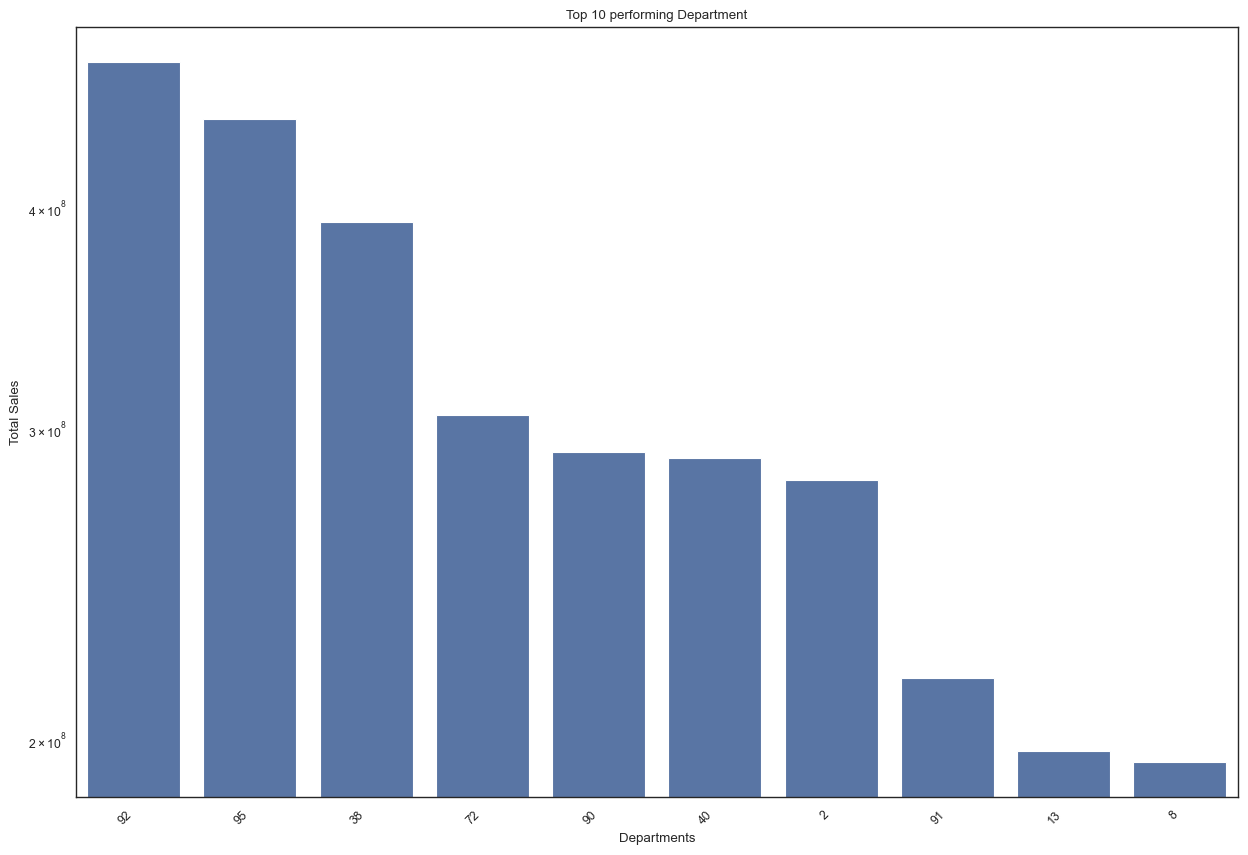

In [309]:
# Top 10 departments by total sales

plt.figure(figsize = (15,10))
sorted_dept = Top10_deptdf.sort_values(['Total_Sales'],ascending = False)['Dept']#get all stores in descending order of Sales
sns.barplot(data = Top10_deptdf, x = 'Dept',y='Total_Sales', order = sorted_dept)
plt.yscale('log')#log scale
plt.title('Top 10 performing Department')
plt.xticks(rotation = 45,ha= 'right')
plt.xlabel('Departments')
plt.ylabel('Total Sales')
plt.show()


In [95]:
Bottom10_deptdf = dept_slsdf.tail(10).sort_values(['Total_Sales']).reset_index(drop=True)
Bottom10_deptdf

,Dept,Total_Sales
0,43,14.32
1,39,177.98
2,78,2066.91
3,51,31011.35
4,45,45496.91
5,47,48225.13
6,77,49891.64
7,99,358409.33
8,54,521124.44
9,60,2005029.46


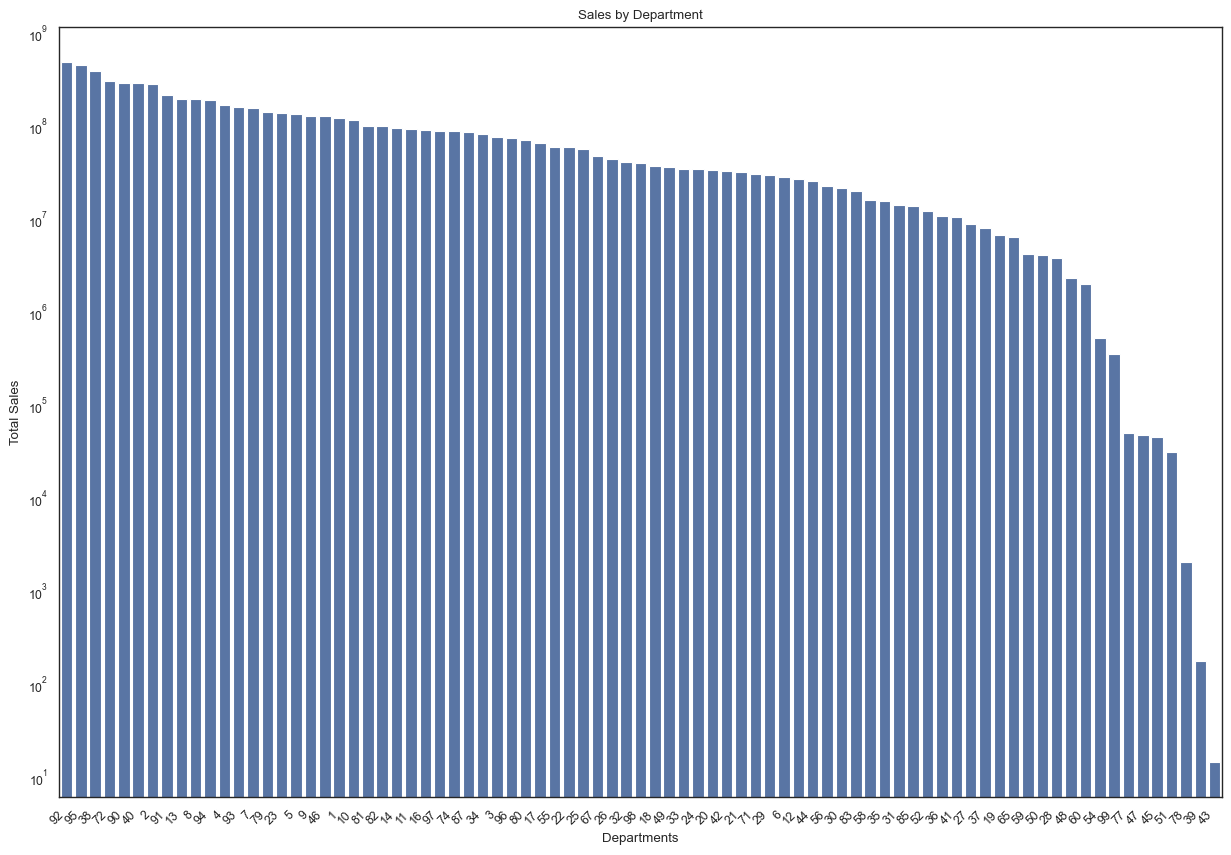

In [96]:
plt.figure(figsize = (15,10))
sorted_dept = dept_slsdf.sort_values(['Total_Sales'],ascending = False)['Dept']#get all stores in descending order of Sales
sns.barplot(data = dept_slsdf, x = 'Dept',y='Total_Sales', order = sorted_dept)
plt.yscale('log')#log scale
plt.title('Sales by Department')
plt.xticks(rotation = 45,ha= 'right')
plt.xlabel('Departments')
plt.ylabel('Total Sales')
plt.show()

In [97]:
#Sales by Date
date_slsdf = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

date_slsdf.columns=['Date','Total_Sales']

date_slsdf = date_slsdf.sort_values(['Total_Sales'],ascending = False).reset_index(drop=True)

#Top 10 Days with highest sales
Top10_daydf = date_slsdf.head(10).reset_index(drop= True)

Top10_daydf

,Date,Total_Sales
0,2010-12-24,80931586.20
1,2011-12-23,76999773.57
2,2011-11-25,66593835.85
3,2010-11-26,65821216.26
4,2010-12-17,61821317.85
5,2011-12-16,60086723.16
6,2010-12-10,55667840.03
7,2011-12-09,55561557.73
8,2012-04-06,53502476.06
9,2012-07-06,51253625.62


Highest sales was on 2010-12-24. Towards the end of the year are higher sales. (date wise thanksgiving and christmas). for Christmas, the promotion period looks different than actual holiday date)

In [99]:
Bottom10_daydf = date_slsdf.tail(10).sort_values(['Total_Sales']).reset_index(drop=True)
Bottom10_daydf

,Date,Total_Sales
0,2011-01-28,39600376.50
1,2012-01-27,39835117.15
2,2010-12-31,40434740.42
3,2011-01-21,40654860.31
4,2011-01-14,40673850.98
5,2010-09-24,41359671.97
6,2012-01-13,42023513.51
7,2012-01-20,42082070.32
8,2011-09-30,42197389.67
9,2010-10-01,42240037.61


Least sales was on 2011-01-28.

In [101]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,MonthStart,WeekinMonth
count,420212.000000,420212.000000,420212,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.0,420212.000000,420212.0,420212,420212.000000
mean,22.195611,44.241309,2011-06-18 07:35:12.682169600,16033.114591,60.090599,3.360890,171.212496,7.960000,136749.732787,2010.968454,6.449866,25.828408,2011-06-03 15:24:47.489171968,2.691815
min,1.000000,1.000000,2010-02-05 00:00:00,0.010000,-2.060000,2.472000,126.064000,3.879000,34875.000000,2010.0,1.000000,1.0,2010-02-01 00:00:00,1.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2120.130000,46.680000,2.933000,132.022667,6.891000,93638.000000,2010.0,4.000000,14.0,2010-10-01 00:00:00,2.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7661.700000,62.090000,3.452000,182.350989,7.866000,140167.000000,2011.0,6.000000,26.0,2011-06-01 00:00:00,3.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20271.265000,74.280000,3.738000,212.445487,8.567000,202505.000000,2012.0,9.000000,38.0,2012-02-01 00:00:00,4.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000,2012.0,12.000000,52.0,2012-10-01 00:00:00,5.000000
std,12.787236,30.508819,NaN,22729.492116,18.447857,0.458519,39.162445,1.863879,60993.084568,0.796898,3.243397,14.152489,NaN,1.263741


In [102]:
# Adding a temp interval since temperature can take any number of values

df['Temp_interval'] = pd.cut(df['Temperature'],10,include_lowest= True) #to include min value in the calculation

df['Temp_interval'].unique()



[(38.82, 49.04], (28.6, 38.82], (49.04, 59.26], (59.26, 69.48], (69.48, 79.7], (79.7, 89.92], (89.92, 100.14], (8.16, 18.38], (18.38, 28.6], (-2.163, 8.16]]
Categories (10, interval[float64, right]): [(-2.163, 8.16] < (8.16, 18.38] < (18.38, 28.6] < (28.6, 38.82] ... (59.26, 69.48] < (69.48, 79.7] < (79.7, 89.92] < (89.92, 100.14]]

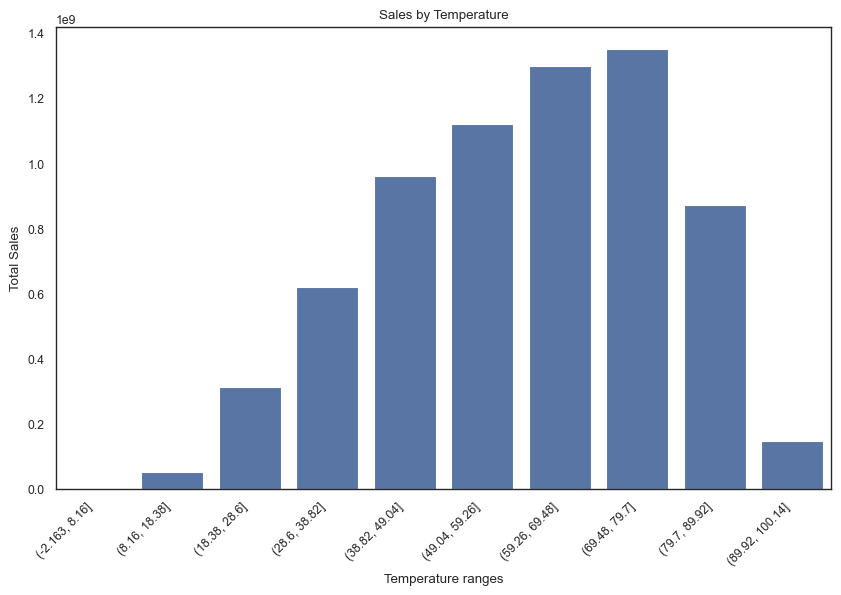

In [103]:
#Sales by Temperature
sales_bytempdf =df.groupby('Temp_interval',observed = False)['Weekly_Sales'].sum().reset_index()

sales_bytempdf.columns = ['Temperature_Interval','Total_Sales']

plt.figure(figsize = (10,6))
sns.barplot(data = sales_bytempdf,x = 'Temperature_Interval',y = 'Total_Sales')
plt.title('Sales by Temperature')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Temperature ranges')
plt.ylabel('Total Sales')
plt.show()

When temperatures are very low or very high, sales are lower.

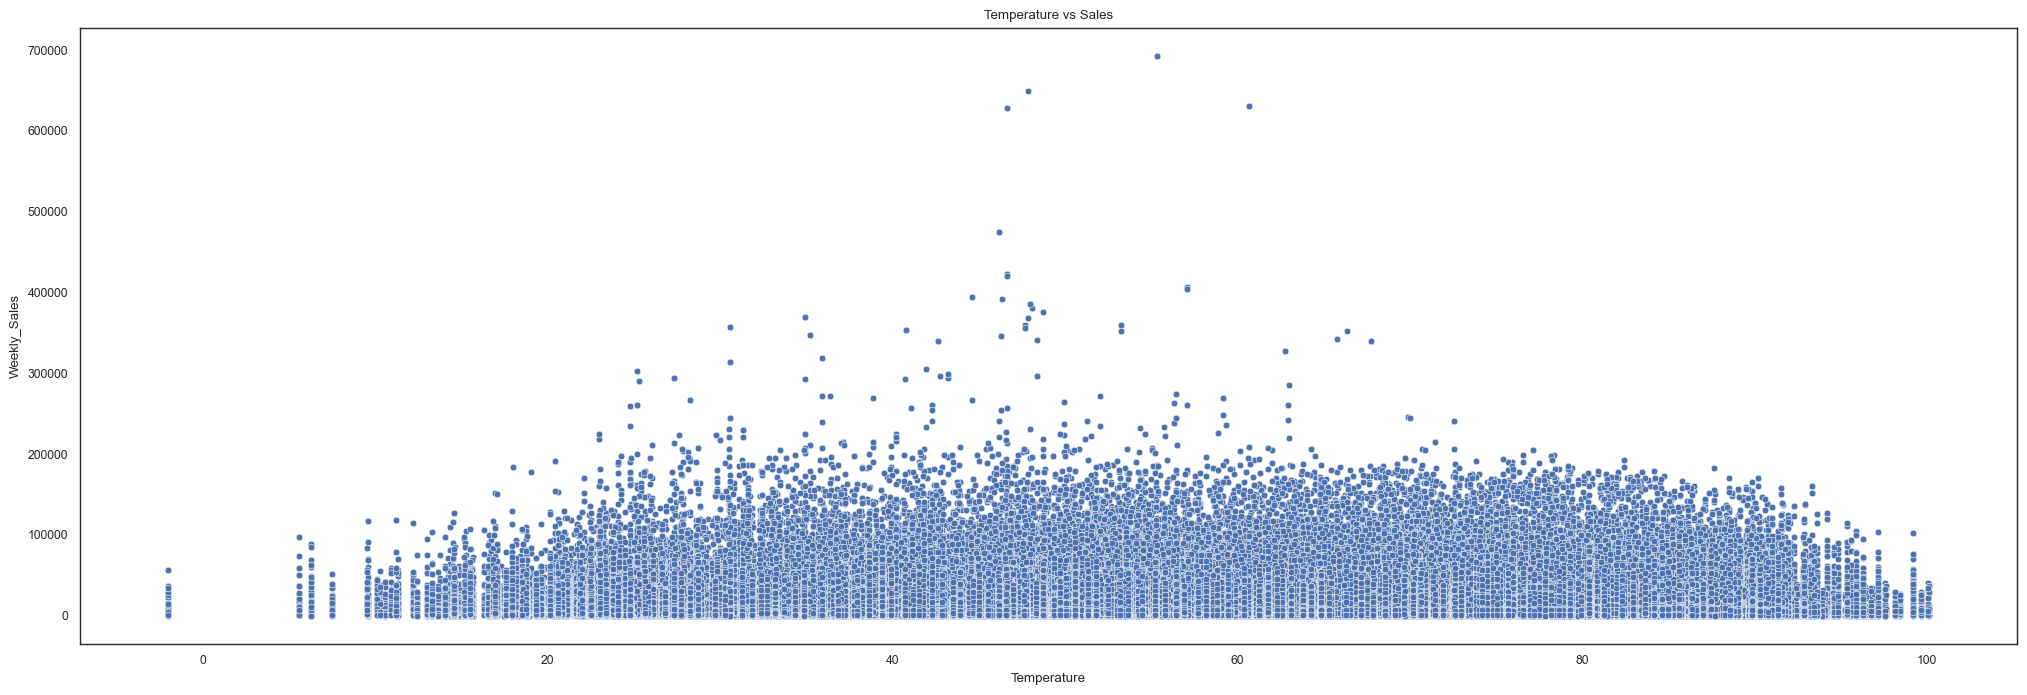

In [105]:
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs Sales')
plt.show()

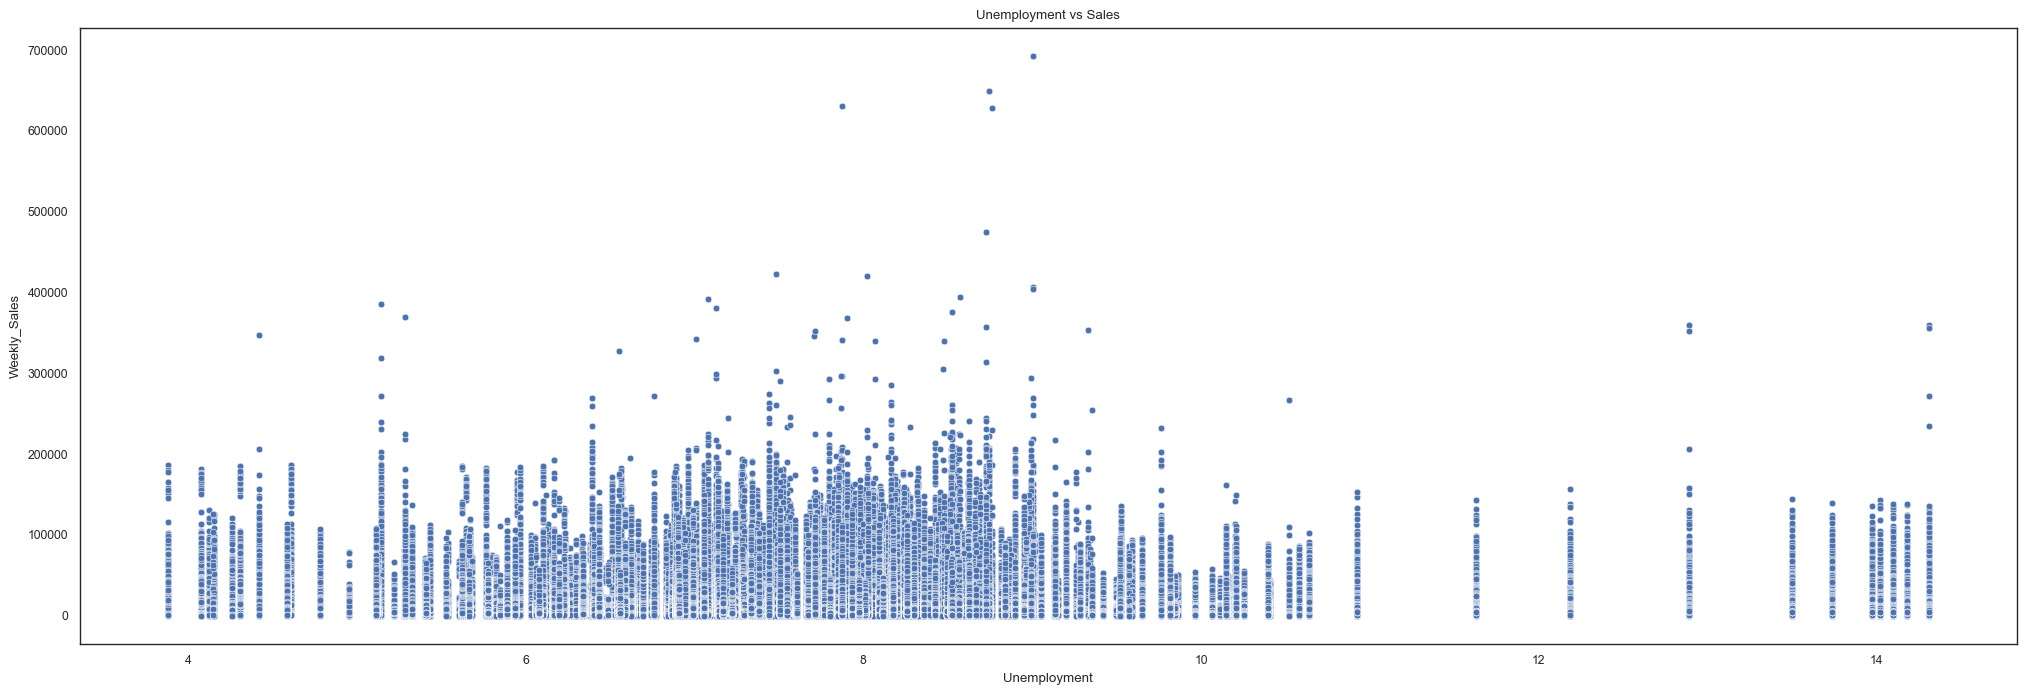

In [106]:
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title('Unemployment vs Sales')
plt.show()

No distinct relationship seen with respect to sales. Sales remain similar indepenendent with change in Unemployment except when very high unemployment where sales tend to be lower

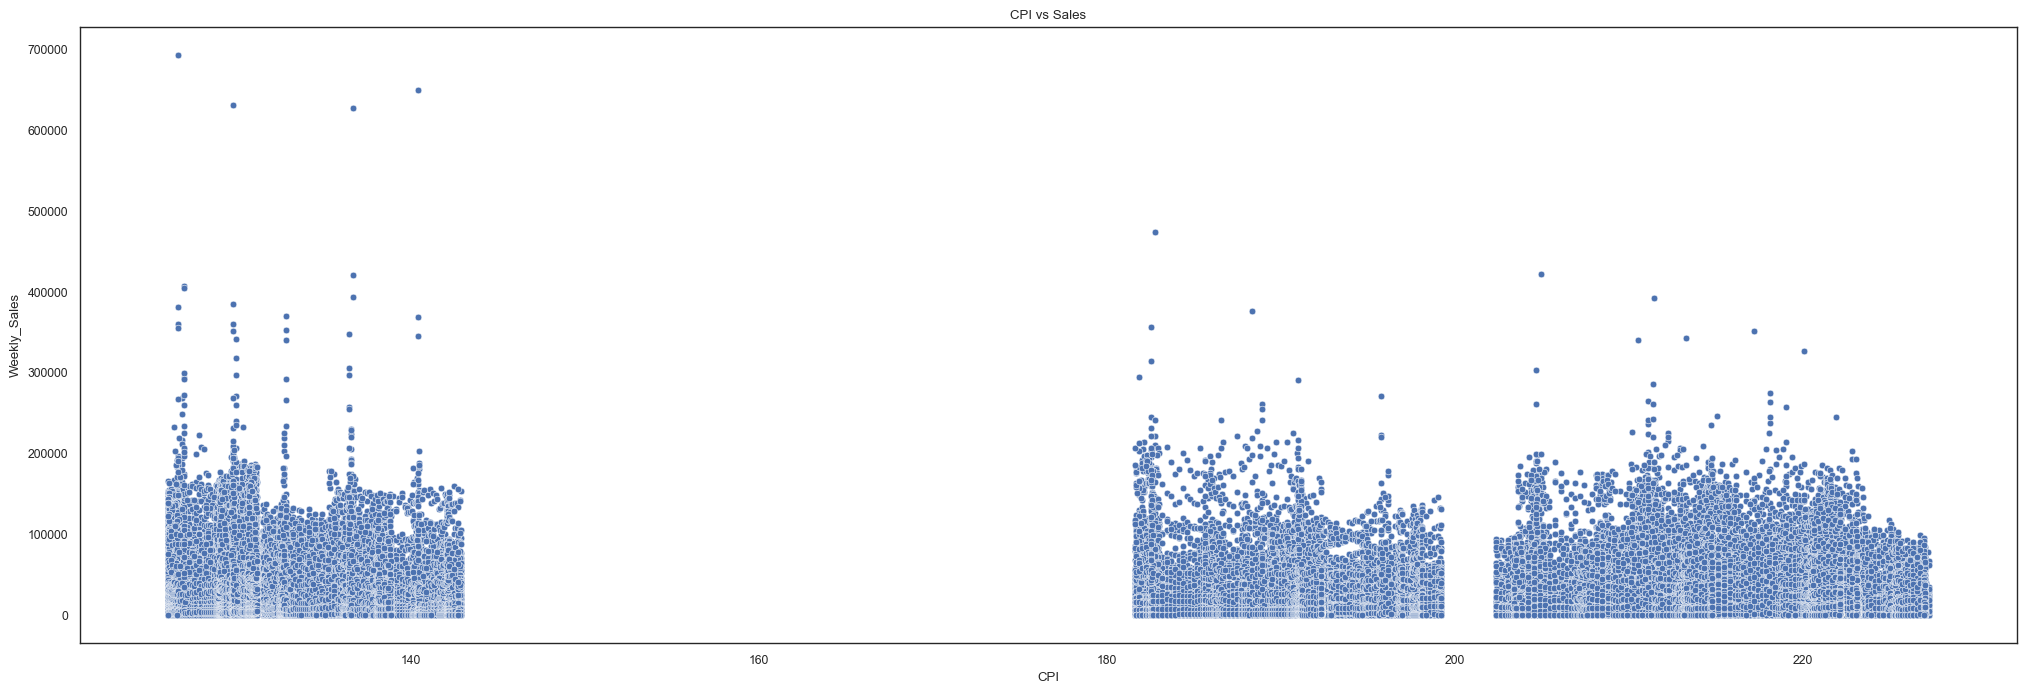

In [108]:
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('CPI vs Sales')
plt.show()

No distinct relationship seen with respect to sales. Sales remain similar indepenendent with increase/decrease in CPI.

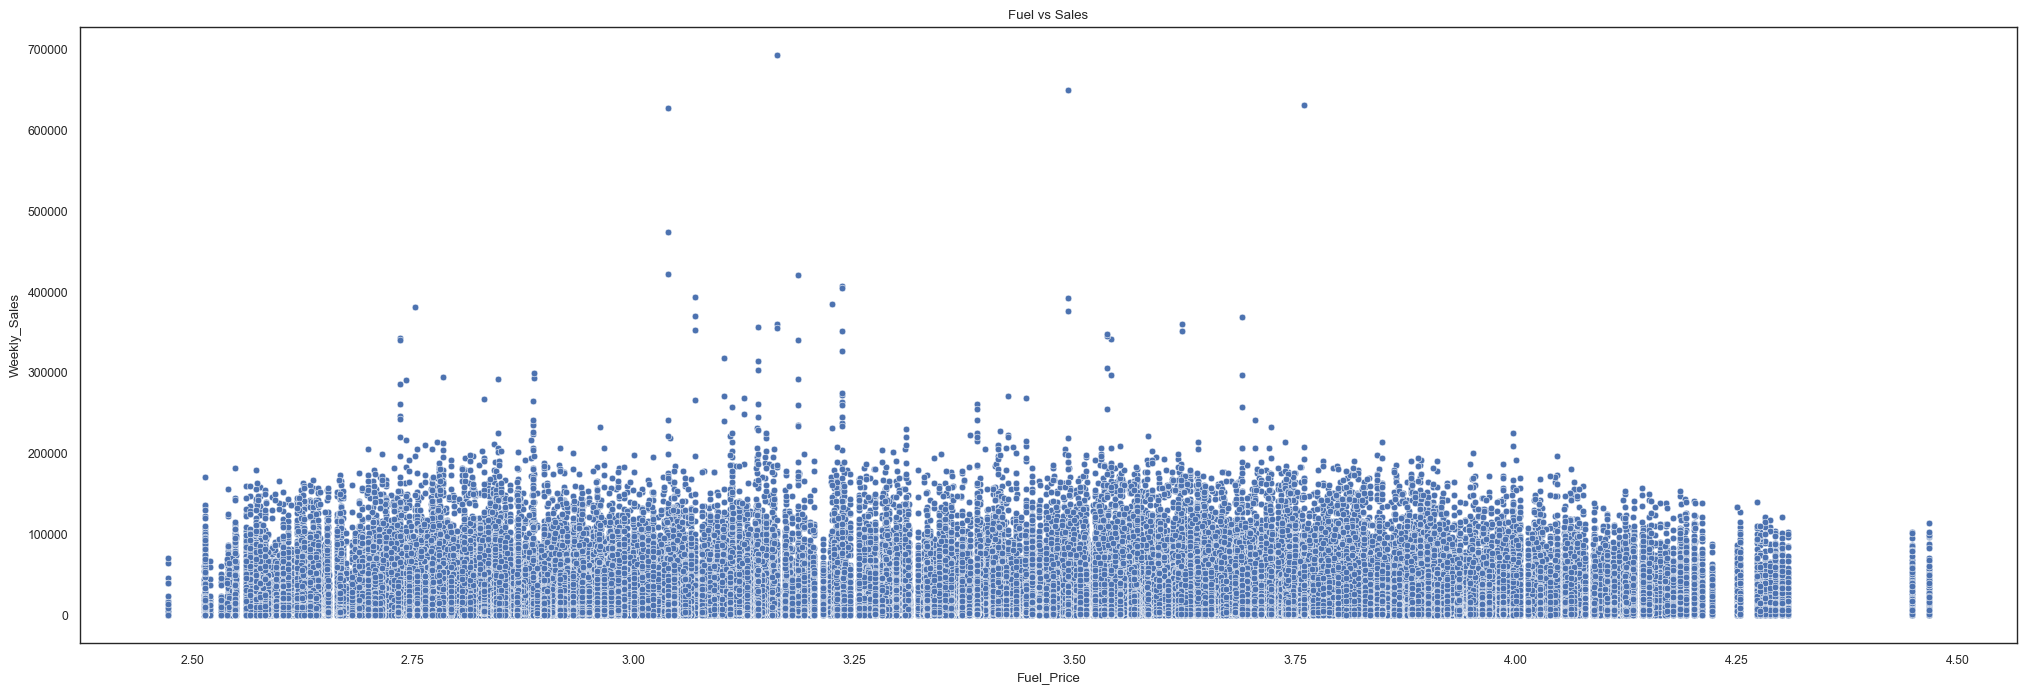

In [110]:
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales')
plt.title('Fuel vs Sales')
plt.show()

No distinct relationship seen with respect to sales. Sales remain similar indepenendent with increase in fuel price.

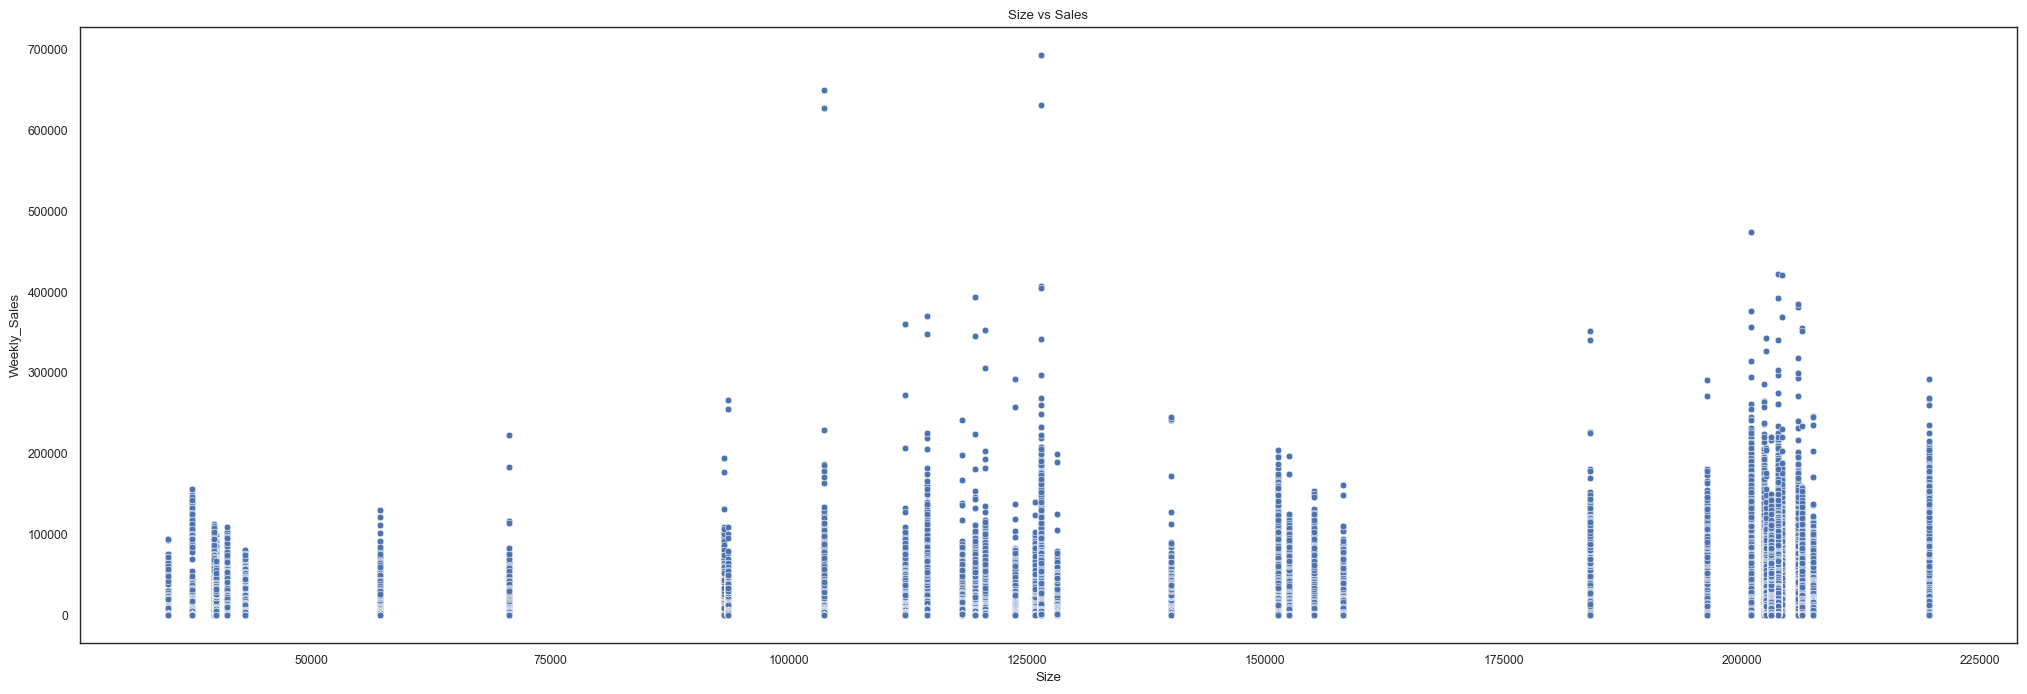

In [112]:
sns.scatterplot(data=df, x='Size', y='Weekly_Sales')
plt.title('Size vs Sales')
plt.show()

High sales for stores with size in the range -(194989.067, 207305.533]. 
No distinct relationship seen with respect to sales. We can drop from consideration.

In [114]:
df[df['Weekly_Sales']<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,MonthStart,WeekinMonth,Temp_interval


In [115]:
#Yearly Sales

year_type_Salesdf = df.groupby(['Type','Year'])['Weekly_Sales'].sum().reset_index()

year_type_Salesdf.columns =['Type','Year','Total_Sales']

year_type_Salesdf

,Type,Year,Total_Sales
0,A,2010,1.465451e+09
1,A,2011,1.578222e+09
2,A,2012,1.287384e+09
3,B,2010,6.899885e+08
4,B,2011,7.241358e+08
5,B,2012,5.866174e+08
6,C,2010,1.334796e+08
7,C,2011,1.458744e+08
8,C,2012,1.261540e+08


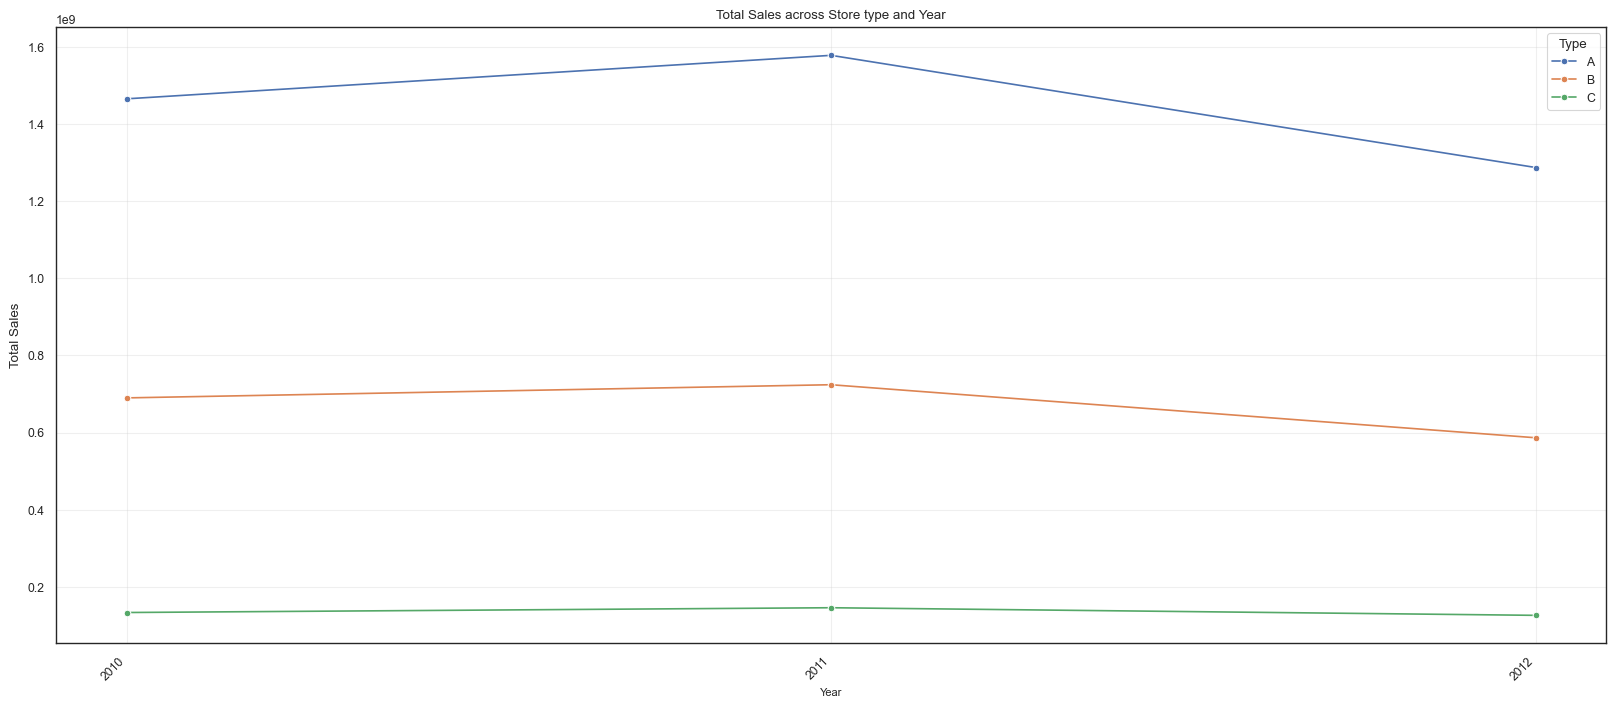

In [116]:

#Total Sales across Month
plt.figure (figsize = (20,8))
sns.lineplot(data = year_type_Salesdf, x = 'Year', y = 'Total_Sales', hue='Type', marker = 'o')
plt.title('Total Sales across Store type and Year')
plt.xticks(ticks= year_type_Salesdf['Year'].unique(), rotation = 45,ha = 'right')
plt.xlabel('Year', fontsize = 8)
plt.ylabel('Total Sales')
plt.grid(alpha = 0.3)
plt.show()

Across all three years, Store type A had more sales. Then store type B and finally Store type C had least Sales.

In [118]:
Holiday_dict = {
    pd.Timestamp('2010-02-12'): 'Super Bowl',
    pd.Timestamp('2011-02-11'): 'Super Bowl',
    pd.Timestamp('2012-02-10'): 'Super Bowl',
    pd.Timestamp('2013-02-08'): 'Super Bowl',
    pd.Timestamp('2010-09-10'): 'Labor Day',
    pd.Timestamp('2011-09-09'): 'Labor Day',
    pd.Timestamp('2012-09-07'): 'Labor Day',
    pd.Timestamp('2013-09-06'): 'Labor Day',
    pd.Timestamp('2010-11-26'): 'Thanksgiving',
    pd.Timestamp('2011-11-25'): 'Thanksgiving',
    pd.Timestamp('2012-11-23'): 'Thanksgiving',
    pd.Timestamp('2013-11-29'): 'Thanksgiving',
    pd.Timestamp('2010-12-31'): 'Christmas',
    pd.Timestamp('2011-12-30'): 'Christmas',
    pd.Timestamp('2012-12-28'): 'Christmas',
    pd.Timestamp('2013-12-27'): 'Christmas'

}


In [119]:

holiday_df = pd.DataFrame(list(Holiday_dict.items()), columns=['Date', 'Holiday'])


holiday_df['Date'] = pd.to_datetime(holiday_df['Date'])

holiday_df = holiday_df.sort_values('Date').reset_index(drop=True)

holiday_df

,Date,Holiday
0,2010-02-12,Super Bowl
1,2010-09-10,Labor Day
2,2010-11-26,Thanksgiving
3,2010-12-31,Christmas
4,2011-02-11,Super Bowl
5,2011-09-09,Labor Day
6,2011-11-25,Thanksgiving
7,2011-12-30,Christmas
8,2012-02-10,Super Bowl
9,2012-09-07,Labor Day


In [120]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,MonthStart,WeekinMonth,Temp_interval
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,2010-02-01,1,"(38.82, 49.04]"
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,6,2010-02-01,2,"(28.6, 38.82]"
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,7,2010-02-01,3,"(38.82, 49.04]"
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,8,2010-02-01,4,"(38.82, 49.04]"
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,9,2010-03-01,1,"(38.82, 49.04]"


In [121]:
df=df.set_index("Date")


In [122]:
df_train = df.loc[df.index <'2012-02-02']

In [224]:
df_test = df.loc[df.index >='2012-02-02']

In [287]:
Features= ['Store','Dept','IsHoliday','Type','Size','Year','Month','Week']
target = 'Weekly_Sales'

X=df[Features]
y = df[target]

X_train = df_train[Features]
y_train = df_train[target]

X_test = df_test[Features]
y_test = df_test[target]


X = pd.get_dummies(X, columns = ['Type','IsHoliday'], drop_first = True)
X.head()

,Store,Dept,Size,Year,Month,Week,Type_B,Type_C,IsHoliday_True
Date,,,,,,,,,
2010-02-05,1,1,151315,2010,2,5,False,False,False
2010-02-12,1,1,151315,2010,2,6,False,False,True
2010-02-19,1,1,151315,2010,2,7,False,False,False
2010-02-26,1,1,151315,2010,2,8,False,False,False
2010-03-05,1,1,151315,2010,3,9,False,False,False


In [289]:
X_train = pd.get_dummies(X_train, columns = ['Type','IsHoliday'], drop_first = True)
X_train.head()

,Store,Dept,Size,Year,Month,Week,Type_B,Type_C,IsHoliday_True
Date,,,,,,,,,
2010-02-05,1,1,151315,2010,2,5,False,False,False
2010-02-12,1,1,151315,2010,2,6,False,False,True
2010-02-19,1,1,151315,2010,2,7,False,False,False
2010-02-26,1,1,151315,2010,2,8,False,False,False
2010-03-05,1,1,151315,2010,3,9,False,False,False


In [291]:
#converting Store Type, Holiday_Name into numerical values from categorical values
#One Hot encoding

X_test = pd.get_dummies(X_test, columns = ['Type','IsHoliday'], drop_first = True)
X_test.head()

,Store,Dept,Size,Year,Month,Week,Type_B,Type_C,IsHoliday_True
Date,,,,,,,,,
2012-02-03,1,1,151315,2012,2,5,False,False,False
2012-02-10,1,1,151315,2012,2,6,False,False,True
2012-02-17,1,1,151315,2012,2,7,False,False,False
2012-02-24,1,1,151315,2012,2,8,False,False,False
2012-03-02,1,1,151315,2012,3,9,False,False,False


In [293]:
# do the same for test data
test_X= test[Features]
test_X = pd.get_dummies(test_X, columns = ['Type','IsHoliday'], drop_first = True)
test_X.head()

,Store,Dept,Size,Year,Month,Week,Type_B,Type_C,IsHoliday_True
0,1,1,151315,2012,11,44,False,False,False
1,1,1,151315,2012,11,45,False,False,False
2,1,1,151315,2012,11,46,False,False,False
3,1,1,151315,2012,11,47,False,False,True
4,1,1,151315,2012,11,48,False,False,False


Model Building

In [240]:
def weighted_mae(dataset,y_true,y_pred):
    weights = dataset.IsHoliday_True.apply (lambda x: 5 if x else 1)
    return np.sum(weights * abs(y_true - y_pred)) / np.sum(weights)

def mape(y_true,y_pred):
    #mean absolute percentage error
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

def rmse(y_true,y_pred):
    #root mean squared error
    return root_mean_squared_error(y_true,y_pred) 

In [242]:
#scale the data such that all values takes similar range of values

#not including it for the moment
scaler = StandardScaler()

#only scale X values since we dont want to look at test set.

column = X_train.columns

#scale X train and test after fitting only X_train
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


test = scaler.transform(test)# for actual test data

In [245]:
X_train

,Store,Dept,Size,Year,Month,Week,Type_B,Type_C,IsHoliday_True
Date,,,,,,,,,
2010-02-05,1,1,151315,2010,2,5,False,False,False
2010-02-12,1,1,151315,2010,2,6,False,False,True
2010-02-19,1,1,151315,2010,2,7,False,False,False
2010-02-26,1,1,151315,2010,2,8,False,False,False
2010-03-05,1,1,151315,2010,3,9,False,False,False
...,...,...,...,...,...,...,...,...,...
2011-12-30,45,98,118221,2011,12,52,True,False,True
2012-01-06,45,98,118221,2012,1,1,True,False,False
2012-01-13,45,98,118221,2012,1,2,True,False,False


In [247]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(X_train,y_train)
y_tr_pred = lg.predict(X_train)
y_tst_pred = lg.predict(X_test)

lg.score(X_test,y_test)

0.09285020832822377

In [249]:
print ('WMAE score of Linear Regression(train):',weighted_mae(X_train,y_train,y_tr_pred))
print ('WMAE score of Linear Regression(test):',weighted_mae(X_test,y_test,y_tst_pred))

WMAE score of Linear Regression(train): 14901.915150880395
WMAE score of Linear Regression(test): 14540.176592981266


We will use these WMAE score as a baseline reference.

In [252]:
model_params = {
    'Decision Tree Regressor' : DecisionTreeRegressor(max_depth = 5, random_state = 0),
    'Random Forest Regressor' : RandomForestRegressor(n_estimators = 50, n_jobs = -1),
    'XGBoost': XGBRegressor()
}

for model_name,model in model_params.items():
    model.fit(X_train,y_train)
    y_pred =model.predict(X_test)
    print ('WMAE score of ', model_name,' : ', weighted_mae(X_test,y_test,y_pred))

WMAE score of  Decision Tree Regressor  :  9375.570597331942
WMAE score of  Random Forest Regressor  :  1598.563185477095
WMAE score of  XGBoost  :  2956.146965010809


Based on the WMAE score, Random forest and XGBoost perform better. Since Random Forest has the least WMAE, lets try to tune it to lower the error more.

In [254]:
rf= RandomForestRegressor(n_estimators=100,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

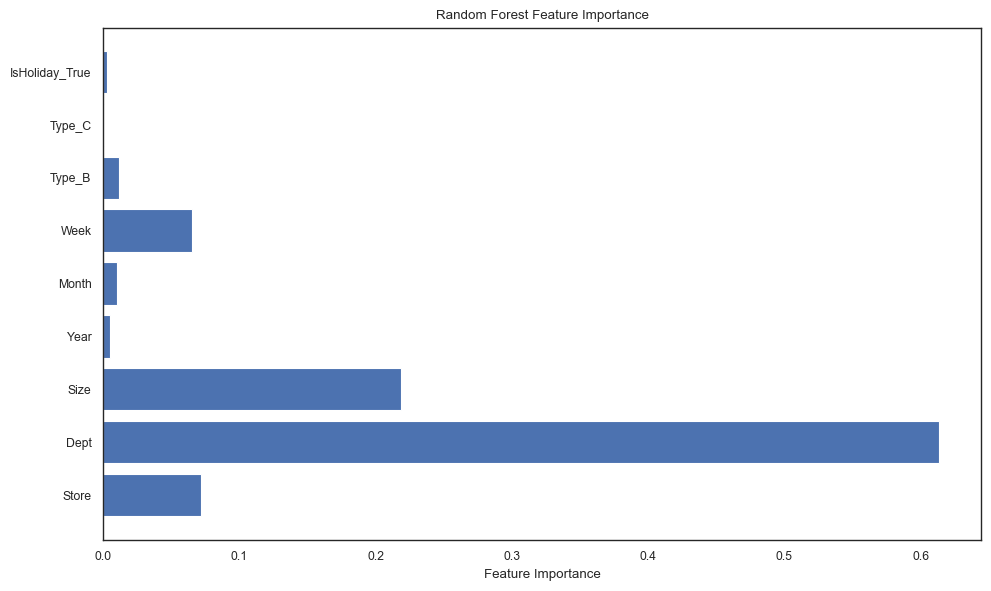

In [255]:
plt.figure(figsize = (10,6))
plt.barh(X_train.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

Top features are Dept, Size, Store, Week

In [260]:
n_estimators = [100,125,140,150]
max_depth = [26,27,30,31]

for ne in n_estimators:
    for d in max_depth:
        rf = RandomForestRegressor(n_estimators = ne,max_depth = d,n_jobs = -1)
        rf.fit(X_train,y_train)
        rf_y_pred = rf.predict(X_test)
        print ('WMAE score of RandomForestRegressor with n_estimators = ', ne,', max_depth = ',d,' : ',weighted_mae(X_test,y_test,rf_y_pred))
    




WMAE score of RandomForestRegressor with n_estimators =  100 , max_depth =  26  :  1591.5811977372175
WMAE score of RandomForestRegressor with n_estimators =  100 , max_depth =  27  :  1589.3282730707856
WMAE score of RandomForestRegressor with n_estimators =  100 , max_depth =  30  :  1593.0585574543306
WMAE score of RandomForestRegressor with n_estimators =  100 , max_depth =  31  :  1594.0920477873062
WMAE score of RandomForestRegressor with n_estimators =  125 , max_depth =  26  :  1589.3225823377331
WMAE score of RandomForestRegressor with n_estimators =  125 , max_depth =  27  :  1591.984858750508
WMAE score of RandomForestRegressor with n_estimators =  125 , max_depth =  30  :  1592.3737510877265
WMAE score of RandomForestRegressor with n_estimators =  125 , max_depth =  31  :  1593.4606652428727
WMAE score of RandomForestRegressor with n_estimators =  140 , max_depth =  26  :  1588.9260189402817
WMAE score of RandomForestRegressor with n_estimators =  140 , max_depth =  27  :  

best parameters found: n_estimators =  150 , max_depth =  26

In [262]:
rfm = RandomForestRegressor(n_estimators = 150,max_depth = 26,n_jobs = -1)
rfm.fit(X_train,y_train)
final_y_pred = rfm.predict(X_test)
rfm.score(X_test,y_test)
print ('Accuracy score of RandomForestRegressor: ',rfm.score(X_test,y_test))
print ('RMSE score of RandomForestRegressor : ',mape(y_test,final_y_pred))
print ('MAPE score of RandomForestRegressor : ',rmse(y_test,final_y_pred))
print ('WMAE score of RandomForestRegressor : ',weighted_mae(X_test,y_test,final_y_pred))

Accuracy score of RandomForestRegressor:  0.9769047735171674
RMSE score of RandomForestRegressor :  2787.790759327378
MAPE score of RandomForestRegressor :  3371.692510807432
WMAE score of RandomForestRegressor :  1588.0726062166889


Final Model

In [247]:
#use entire train data to fit and use test data to predict

In [295]:
rfm = RandomForestRegressor(n_estimators = 150,max_depth = 26,n_jobs = -1)
rfm.fit(X,y)
y_pred = rfm.predict(test_X)

In [297]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,MonthStart,WeekinMonth
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,11,44,2012-11-01,1
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573,A,151315,2012,11,45,2012-11-01,2
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573,A,151315,2012,11,46,2012-11-01,3
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573,A,151315,2012,11,47,2012-11-01,4
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573,A,151315,2012,11,48,2012-11-01,5


In [299]:
y_pred

array([31554.8584    , 18890.37166667, 19108.16853333, ...,
         701.1694    ,   778.17033333,   698.40653333])

In [301]:
test['Weekly_Sales'] = y_pred.round(2)

In [303]:
test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,MonthStart,WeekinMonth,Weekly_Sales
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573000,A,151315,2012,11,44,2012-11-01,1,31554.86
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573000,A,151315,2012,11,45,2012-11-01,2,18890.37
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573000,A,151315,2012,11,46,2012-11-01,3,19108.17
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573000,A,151315,2012,11,47,2012-11-01,4,20299.55
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573000,A,151315,2012,11,48,2012-11-01,5,21782.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,172.460809,7.826821,B,118221,2013,6,26,2013-06-01,4,677.14
115060,45,98,2013-07-05,False,77.50,3.614,172.460809,7.826821,B,118221,2013,7,27,2013-07-01,1,685.15
115061,45,98,2013-07-12,False,79.37,3.614,172.460809,7.826821,B,118221,2013,7,28,2013-07-01,2,701.17
115062,45,98,2013-07-19,False,82.84,3.737,172.460809,7.826821,B,118221,2013,7,29,2013-07-01,3,778.17


All Done!!